In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataR2.csv')
shuffled_df = df.sample(frac=1)
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print('X.shape:', X.shape)
print('y.shape:', y.shape)
feature_names = df.columns[:-1]
target_names = ['Healthy controls', 'Patients']

X.shape: (116, 9)
y.shape: (116,)


# Single feature diagrams

In [4]:
def draw_one_f_plot(feature1):
    for c in range(1, 3):
        plt.plot(shuffled_df[y == c].index, X[y == c, feature1], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel("Index")
    plt.ylabel(feature_names[feature1])
    plt.grid()
    plt.legend()

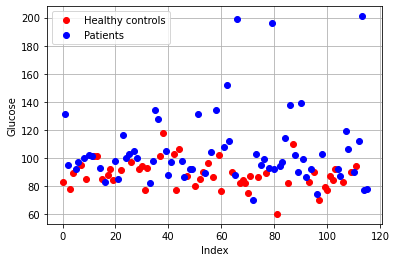

In [5]:
draw_one_f_plot(2)

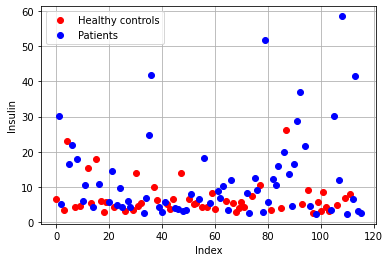

In [6]:
draw_one_f_plot(3)

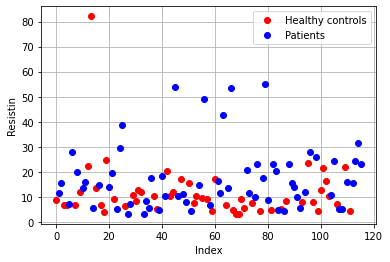

In [7]:
draw_one_f_plot(7)

## Of all the features, the features diagrammed were more appropriate than the others to distinguish between sick and healthy samples. But in general it can not be said that their separation can be done simply and linearly.

# Feature Pair Charts

In [8]:
def draw_features_plot(feature1, feature2):
    for c in range(1, 3):
        plt.plot(X[y == c, feature1], X[y == c, feature2], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.grid()
    plt.legend()

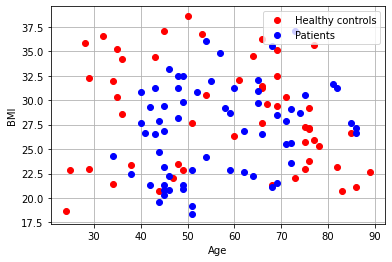

In [9]:
feature1 = 0
feature2 = 1
draw_features_plot(feature1, feature2)

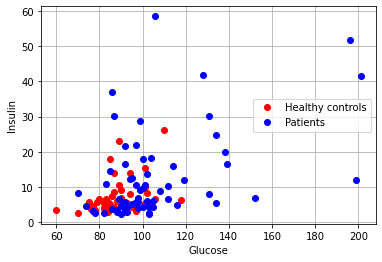

In [10]:
feature1 = 2
feature2 = 3
draw_features_plot(feature1, feature2)

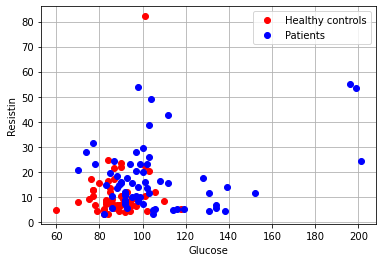

In [11]:
draw_features_plot(2, 7)

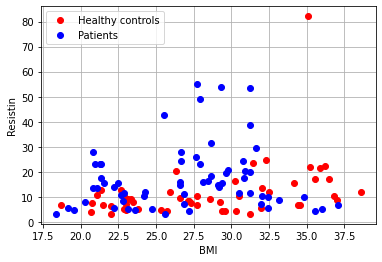

In [12]:
draw_features_plot(1, 7)

## The available features have plotted pairs of elements that seemed easy to separate using different uniques. But in general, it is still possible to say that other groups also examples of disease and health are needed and have a large number of features (which can be used and the need to use learning models Has a nonlinear machine) to be used.

# Normalization

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = (X - X.mean(axis=0))/ X.std(axis=0)
print(X)

          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0   -0.577289 -0.813147 -1.233869 -0.725591 -0.611629 -0.928307    -0.069918   
1    1.594902 -1.372795 -0.257184 -0.685066 -0.545872 -0.926394    -0.694338   
2    1.532839 -0.887912 -0.301578 -0.547697 -0.462745 -0.452257     1.790232   
3    0.663963 -1.237933 -0.923106 -0.674041 -0.571729 -0.872237    -0.440036   
4    1.781089 -1.289009 -0.257184 -0.641958 -0.518830 -1.038178    -0.783482   
..        ...       ...       ...       ...       ...       ...          ...   
111 -0.763477 -0.145835 -0.257184 -0.663711 -0.532476  1.462988     0.280437   
112  0.291587 -0.147827  0.097975 -0.544519 -0.433160 -0.738407     1.642345   
113  0.477775  0.889994 -0.035210 -0.425326 -0.363529  1.817463     1.806008   
114  0.912213 -0.396824 -0.701132 -0.714368 -0.583353 -0.086277     3.444096   
115  1.781089 -0.080100  1.784977  0.983129  1.120903  3.318769     0.574153   

     Resistin     MCP.1  
0   -0.543161

# k-fold cross-validation

In [14]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [15]:
model_accuracy = {}

In [16]:
_k = 5
def calc_train_test_acc(model):
    train_acc_score = []
    test_acc_score = []

    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]
        
        model.fit(X_train,y_train)
        pred_train_values = model.predict(X_train)
        pred_test_values = model.predict(X_test)

        train_acc = accuracy_score(pred_train_values , y_train)
        test_acc = accuracy_score(pred_test_values , y_test)
        
        train_acc_score.append(train_acc)
        test_acc_score.append(test_acc)
        
    train_avg_acc_score = sum(train_acc_score)/_k
    test_avg_acc_score = sum(test_acc_score)/_k

    return train_avg_acc_score, test_avg_acc_score


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['logistic regression'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 0.7909770920991118
Test accuracy of each fold: 0.7764492753623188


# SVM with linear kernel

In [18]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['SVM with linear kernel'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 0.7887564282374943
Test accuracy of each fold: 0.7242753623188406


# SVM with rbf kernel

In [19]:
model = SVC(kernel='rbf')
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['SVM with rbf kernel'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 0.8750584385226741
Test accuracy of each fold: 0.7496376811594203


# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)

model_accuracy['Decision tree'] = [train_avg_acc_score, test_avg_acc_score]
print('Train accuracy of each fold: {}'.format(train_avg_acc_score))
print('Test accuracy of each fold: {}'.format(test_avg_acc_score))

Train accuracy of each fold: 1.0
Test accuracy of each fold: 0.7242753623188406


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

K = []
Accuracy = []
train_scores_dict = {}
test_scores_dict = {}

for k_value in range(2, 21):
    model = KNeighborsClassifier(n_neighbors = k_value)
    train_avg_acc_score, test_avg_acc_score = calc_train_test_acc(model)
    
    Accuracy.append(test_avg_acc_score)
    K.append(k_value)
    train_scores_dict[k_value] = train_avg_acc_score
    test_scores_dict[k_value] = test_avg_acc_score

In [22]:
import operator
print('K , test score')
for k, v in test_scores_dict.items():
    print(k, ':', v)
# get max acc
best_k_train = max(train_scores_dict.items(), key=operator.itemgetter(1))[0]
print('Best value for k(tain): {}'.format(best_k_train))
best_k_test = max(test_scores_dict.items(), key=operator.itemgetter(1))[0]
print('Best value for k(test): {}'.format(best_k_test))

model_accuracy['KNN'] = [train_scores_dict[best_k_train], test_scores_dict[best_k_test]]

K , test score
2 : 0.6728260869565218
3 : 0.7757246376811594
4 : 0.733695652173913
5 : 0.7760869565217391
6 : 0.7760869565217391
7 : 0.7496376811594203
8 : 0.7159420289855072
9 : 0.7242753623188406
10 : 0.7329710144927537
11 : 0.7242753623188405
12 : 0.7420289855072463
13 : 0.7155797101449275
14 : 0.7079710144927537
15 : 0.6902173913043479
16 : 0.6989130434782609
17 : 0.6985507246376811
18 : 0.7159420289855072
19 : 0.6981884057971015
20 : 0.6898550724637681
Best value for k(tain): 3
Best value for k(test): 5


# Accuracy of Train set by k values

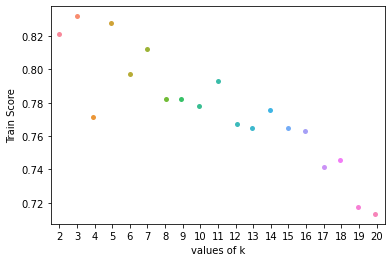

In [23]:
ax = sns.stripplot(K, list(train_scores_dict.values()));
ax.set(xlabel ='values of k', ylabel ='Train Score')  
plt.show()

# Accuracy of Test set by k values

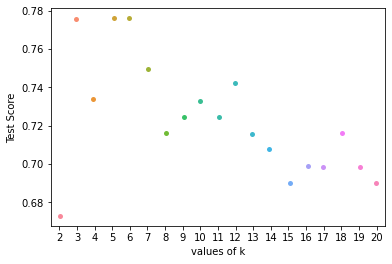

In [24]:
ax = sns.stripplot(K, list(test_scores_dict.values()));
ax.set(xlabel ='values of k', ylabel ='Test Score')  
plt.show()

## According to the diagrams, the best choices are 3 for K in the training part and 5 in the test part.

# Accuracy of Train set based on model

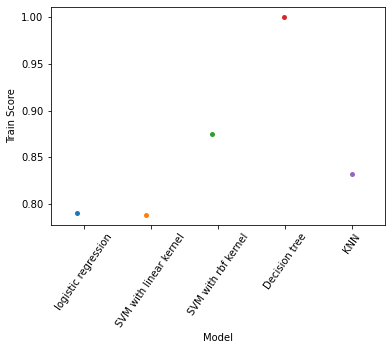

In [25]:
ax = sns.stripplot(list(model_accuracy.keys()), [x[0] for x in list(model_accuracy.values())]);
ax.set(xlabel ='Model', ylabel ='Train Score')  
plt.xticks(rotation=55)
plt.show()

# Accuracy of Test set based on model

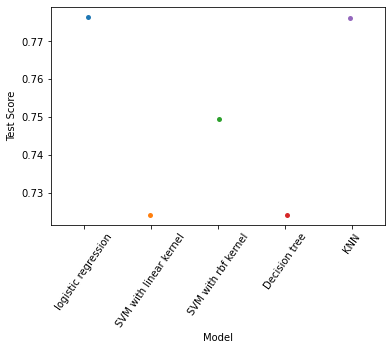

In [26]:
ax = sns.stripplot(list(model_accuracy.keys()), [x[1] for x in list(model_accuracy.values())]);
ax.set(xlabel ='Model', ylabel ='Test Score')  
plt.xticks(rotation=55)
plt.show()

# Rank models based on accuracy

In [28]:
sorted_by_test_score = {k: v for k, v in sorted(model_accuracy.items(), key=lambda item: item[1][1], reverse=True)}
for i, k in zip(range(len(sorted_by_test_score.keys())), sorted_by_test_score.keys()):
    print(i+1, k)

1 logistic regression
2 KNN
3 SVM with rbf kernel
4 SVM with linear kernel
5 Decision tree


## As can be seen from the diagrams, models with very high accuracy on the training data but a much lower accuracy on the test data are over-fitted and unsuitable. By comparing the plots, it can be concluded that, in general, the logistic regression model is the best and has acceptable accuracy on both training and test data. Therefore, this model is selected, and the next rank is KNN.